In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
X = pd.concat([X, pd.get_dummies(df['Gender'], drop_first=True), pd.get_dummies(df['Geography'], drop_first=True)], axis=1)
y = df['Exited']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

C:\Users\PV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train, batch_size=10, epochs=50)

Epoch 1/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7272 - loss: 0.5803
Epoch 2/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7903 - loss: 0.4531
Epoch 3/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8011 - loss: 0.4428
Epoch 4/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8030 - loss: 0.4313
Epoch 5/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8093 - loss: 0.4238
Epoch 6/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8161 - loss: 0.4125
Epoch 7/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8263 - loss: 0.3944
Epoch 8/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8329 - loss: 0.3926
Epoch 9/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8358 - loss: 0.3885
Epoch 10/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8434 - loss: 0.3769
Epoch 11/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8483 - loss: 0.3653
Epoch 12/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

In [9]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [10]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [11]:
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2336   80]
 [ 302  282]]
Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.92      2416
           1       0.78      0.48      0.60       584

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.76      3000
weighted avg       0.86      0.87      0.86      3000



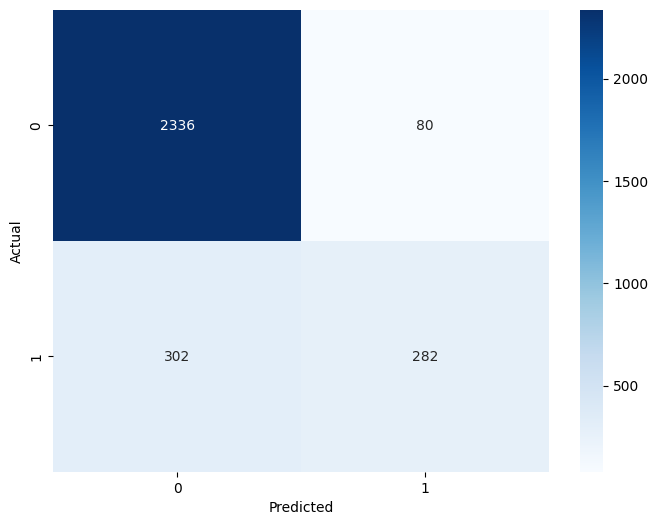

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()